In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [121]:
data=pd.read_csv('D:/DATA SCIENCE/ASSIGNMENT/QUESTION/DECISION TREE/Company_Data.csv')

In [4]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [26]:
#threshold_value = 9


In [27]:
#data['high_sales']=data['Sales']>=threshold_value

In [5]:
label_encoder=preprocessing.LabelEncoder()

In [6]:
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])


In [7]:
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])

In [8]:
y=data['Sales']

In [9]:
data1=data.drop(columns=['Population'])

In [10]:
data1

,Sales,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,120,0,42,17,1,1
1,11.22,111,48,16,83,1,65,10,1,1
2,10.06,113,35,10,80,2,59,12,1,1
3,7.40,117,100,4,97,2,55,14,1,1
4,4.15,141,64,3,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,128,1,33,14,1,1
396,6.14,139,23,3,120,2,55,11,0,1
397,7.41,162,26,12,159,2,40,18,1,1
398,5.94,100,79,7,95,0,50,12,1,1


In [11]:
x=data1.iloc[:,1:10]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=13)

In [14]:
x_train

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Education,Urban,US
291,118,70,0,89,0,39,17,1,0
50,99,32,18,108,0,80,16,1,1
57,93,91,0,117,0,75,11,1,0
195,117,93,4,112,0,66,11,1,1
351,124,115,16,105,2,62,16,0,1
...,...,...,...,...,...,...,...,...,...
230,115,60,0,114,0,38,14,0,0
16,118,32,0,110,1,63,13,1,0
74,150,68,5,136,2,64,13,0,1
176,138,107,9,154,2,47,11,0,1


In [22]:
y_test

67      9.01
224     4.10
51      4.42
7      11.85
312     6.80
       ...  
91      4.81
260     7.67
349     9.32
325    11.70
276     6.93
Name: Sales, Length: 320, dtype: float64

In [48]:
model=DecisionTreeRegressor(max_depth=6,min_samples_split=10)

In [49]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
metrics.mean_absolute_percentage_error(y_test,pred)

109493765940445.67

In [50]:
model.score(x_test,y_test)

0.09919978051127243

In [51]:
model.score(x_train,y_train)

0.8268747715030669

In [83]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [117]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['sale']

In [118]:
model.feature_importances_

array([0.19342722, 0.04958354, 0.02865964, 0.3654093 , 0.20801766,
       0.13513865, 0.01976398, 0.        , 0.        ])

[Text(0.3888888888888889, 0.9285714285714286, 'Population <= 100.5\nsquared_error = 7.808\nsamples = 80\nvalue = 7.41'),
 Text(0.2222222222222222, 0.7857142857142857, 'CompPrice <= 136.0\nsquared_error = 9.004\nsamples = 16\nvalue = 10.334'),
 Text(0.16666666666666666, 0.6428571428571429, 'ShelveLoc <= 70.0\nsquared_error = 5.55\nsamples = 13\nvalue = 9.375'),
 Text(0.1111111111111111, 0.5, 'ShelveLoc <= 41.0\nsquared_error = 2.664\nsamples = 11\nvalue = 10.063'),
 Text(0.05555555555555555, 0.35714285714285715, 'squared_error = 2.61\nsamples = 4\nvalue = 8.79'),
 Text(0.16666666666666666, 0.35714285714285715, 'squared_error = 1.241\nsamples = 7\nvalue = 10.79'),
 Text(0.2222222222222222, 0.5, 'squared_error = 4.494\nsamples = 2\nvalue = 5.59'),
 Text(0.2777777777777778, 0.6428571428571429, 'squared_error = 2.711\nsamples = 3\nvalue = 14.49'),
 Text(0.5555555555555556, 0.7857142857142857, 'Price <= 0.5\nsquared_error = 4.837\nsamples = 64\nvalue = 6.678'),
 Text(0.3888888888888889, 0.64

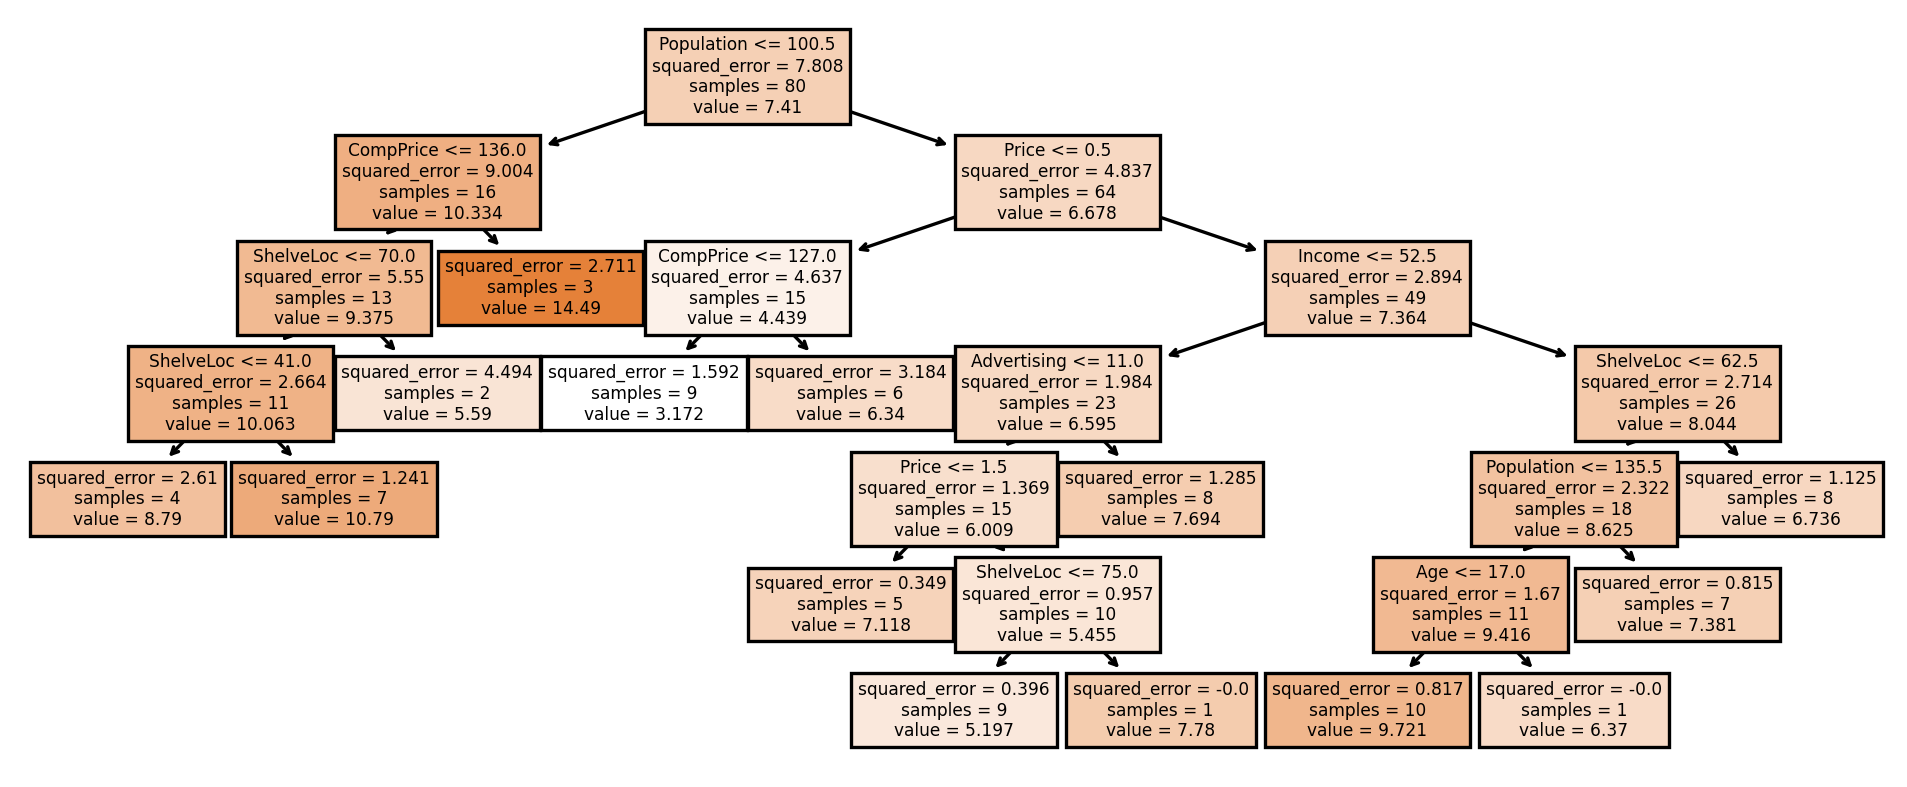

In [85]:
plt.subplots(figsize=(10,4),dpi=240)
tree.plot_tree(model,filled=True,feature_names=fn,class_names=cn)

In [99]:
model1=BaggingRegressor(n_estimators=500,max_samples=0.8,max_features=9)

In [100]:
model1.fit(x_train,y_train)

BaggingRegressor(max_features=9, max_samples=0.8, n_estimators=500)

In [101]:
pred=model1.predict(x_test)
metrics.mean_absolute_percentage_error(y_test,pred)


85248637346496.39

In [102]:
model1.score(x_test,y_test)

0.46688849705564583

In [109]:
model2=RandomForestRegressor(n_estimators=500,min_samples_split=10)

In [110]:
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
metrics.mean_absolute_percentage_error(y_test,pred)

85768269187888.14

In [111]:
model2.score(x_test,y_test)

0.4318555570407263

In [112]:
model2.score(x_train,y_train)

0.8209806010421297

In [123]:
model2.feature_importances_

array([0.16123803, 0.06250188, 0.04048144, 0.4088264 , 0.21769311,
       0.07754593, 0.02394876, 0.00097706, 0.00678739])